In [96]:
import pandas as pd
import yfinance as yf
from pandas.plotting import scatter_matrix
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import numpy as np

# Download AORD...HSI data from Yahoo Finance

data_aord = yf.download('^AORD', start='2018-08-23', end='2023-08-23')
data_nikkei = yf.download('^N225', start='2018-08-23', end='2023-08-23')
data_daxi = yf.download('^GDAXI', start='2018-08-23', end='2023-08-23')
data_cac40 = yf.download('^FCHI', start='2018-08-23', end='2023-08-23')
data_sp500 = yf.download('^GSPC', start='2018-08-23', end='2023-08-23')
data_dji = yf.download('^DJI', start='2018-08-23', end='2023-08-23')
data_nasdaq = yf.download('^IXIC', start='2018-08-23', end='2023-08-23')
data_spy = yf.download('SPY', start='2018-08-23', end='2023-08-23')
data_hsi = yf.download('^HSI', start='2018-08-23', end='2023-08-23')

data_aord.to_csv('AORD_data.csv')
data_nikkei.to_csv('Nikkei_data.csv')
data_daxi.to_csv('DAX_data.csv')
data_cac40.to_csv('CAC40_data.csv')
data_sp500.to_csv('SP500_data.csv')
data_dji.to_csv('DJI_data.csv')
data_nasdaq.to_csv('Nasdaq_data.csv')
data_spy.to_csv('SPY_data.csv')
data_hsi.to_csv('HSI_data.csv')

aord = pd.read_csv('AORD_data.csv')
nikkei = pd.read_csv('Nikkei_data.csv')
daxi = pd.read_csv('DAX_data.csv')
cac40 = pd.read_csv('CAC40_data.csv')
sp500 = pd.read_csv('SP500_data.csv')
dji = pd.read_csv('DJI_data.csv')
nasdaq = pd.read_csv('Nasdaq_data.csv')
spy = pd.read_csv('SPY_data.csv')
hsi = pd.read_csv('HSI_data.csv')

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [97]:
#Data munging
# Due to the timezone issues, we extract and calculate appropriate stock market data for analysis

indicepanel=pd.DataFrame(index=spy.index)

indicepanel['spy']=spy['Open'].shift(-1)-spy['Open']
indicepanel['spy_lag1']=indicepanel['spy'].shift(1)
indicepanel['sp500']=sp500["Open"]-sp500['Open'].shift(1)
indicepanel['nasdaq']=nasdaq['Open']-nasdaq['Open'].shift(1)
indicepanel['dji']=dji['Open']-dji['Open'].shift(1)

indicepanel['cac40']=cac40['Open']-cac40['Open'].shift(1)
indicepanel['daxi']=daxi['Open']-daxi['Open'].shift(1)

indicepanel['aord']=aord['Close']-aord['Open']
indicepanel['hsi']=hsi['Close']-hsi['Open']
indicepanel['nikkei']=nikkei['Close']-nikkei['Open']
indicepanel['Price']=spy['Open']

In [98]:
indicepanel.head()

,spy,spy_lag1,sp500,nasdaq,dji,cac40,daxi,aord,hsi,nikkei,Price
0,0.470001,NaN,NaN,NaN,NaN,NaN,NaN,-13.500000,-214.869141,-9.849609,285.970001
1,2.419983,0.470001,2.060059,21.339844,-26.279297,0.389648,29.209961,-2.399902,105.888672,117.759766,286.440002
2,1.440002,2.419983,22.339844,81.830078,194.130859,32.620117,66.059570,23.200195,254.609375,105.951172,288.859985
3,-0.139984,1.440002,16.760010,49.369629,209.988281,34.109863,115.900391,32.500000,-179.271484,-154.269531,290.299988
4,0.779999,-0.139984,-0.829834,5.330078,-10.169922,6.440430,-24.790039,43.399902,53.599609,27.361328,290.160004


In [99]:
#Drop NaN values

indicepanel = indicepanel.fillna(method='ffill')
indicepanel = indicepanel.dropna()

In [100]:
#Data splitting

Train = indicepanel.iloc[-1000:-500, :]
Test = indicepanel.iloc[-500:, :]
print(Train.shape, Test.shape)

(500, 11) (500, 11)


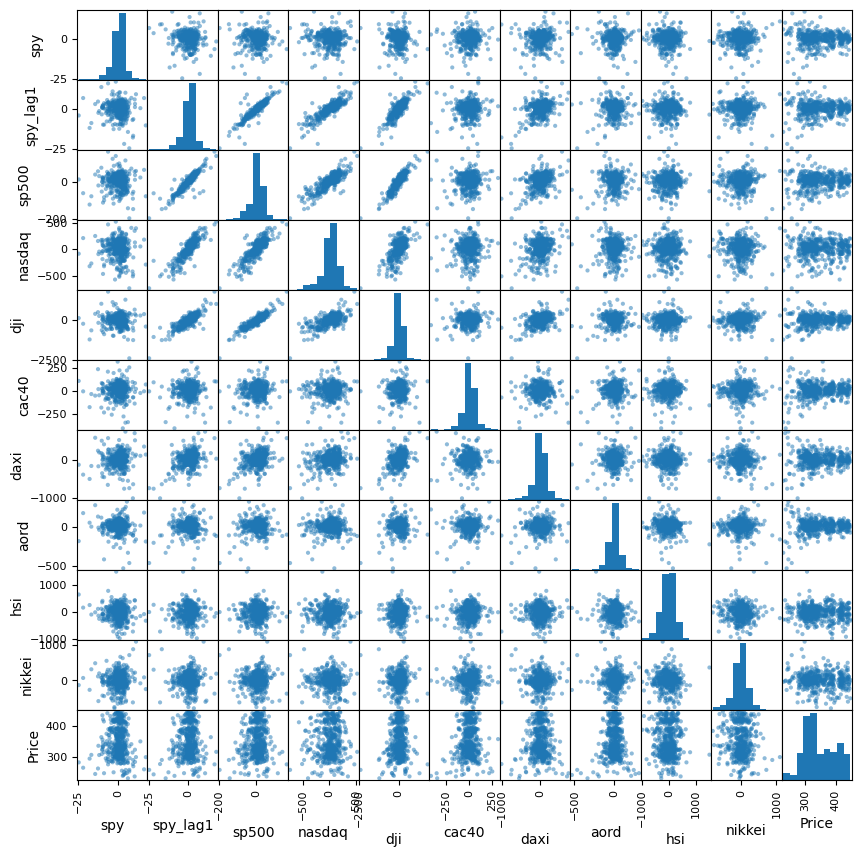

In [101]:
#Generate scatter matrix among all stock markets to observe the association

sm = scatter_matrix(Train, figsize=(10, 10))

In [102]:
#Check the correlation and calculate OLS

corr_array = Train.iloc[:, :-1].corr()['spy']
print(corr_array)
formula = 'spy~spy_lag1+sp500+nasdaq+dji+cac40+aord+daxi+nikkei+hsi'
lm = smf.ols(formula=formula, data=Train).fit()
lm.summary()

spy         1.000000
spy_lag1   -0.086116
sp500      -0.027563
nasdaq     -0.051537
dji        -0.049355
cac40       0.014915
daxi        0.090040
aord       -0.040205
hsi        -0.069267
nikkei      0.066046
Name: spy, dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    spy   R-squared:                       0.059
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     3.429
Date:                Fri, 25 Aug 2023   Prob (F-statistic):           0.000415
Time:                        00:40:34   Log-Likelihood:                -1425.7
No. Observations:                 500   AIC:                             2871.
Df Residuals:                     490   BIC:                             2914.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2631      0.191      1.374      0.170      -0.113       0.639
spy_lag1      -0.3613      0.133     -2.725      0.007      -0.622      -0.101
sp500          0.0632      0.023      2.785      0.006       0.019       0.108
nasdaq        -0.0017      0.003     -0.493      0.623      -0.009       0.005
dji           -0.0035      0.002     -1.815      0.070      -0.007       0.000
cac40          0.0006      0.003      0.229      0.819      -0.005       0.006
aord          -0.0027      0.002     -1.144      0.253      -0.007       0.002
daxi           0.0040      0.001      3.445      0.001       0.002       0.006
nikkei         0.0012      0.001      1.361      0.174      -0.001       0.003
hsi           -0.0011      0.001     -1.600      0.110      -0.003       0.000
==============================================================================
Omnibus:                      130.543   Durbin-Watson:                   2.064
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              649.209
Skew:                          -1.050   Prob(JB):                    1.06e-141
Kurtosis:                       8.172   Cond. No.                         376.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

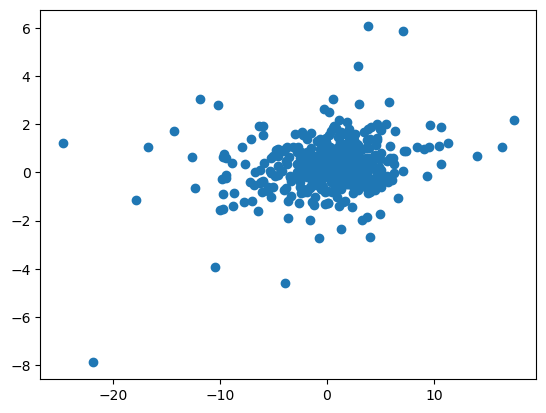

In [103]:
#Make prediction

Train_copy = Train.copy()
Test_copy = Test.copy()

Train_copy.loc[:, 'PredictedY'] = lm.predict(Train_copy)
Test_copy.loc[:, 'PredictedY'] = lm.predict(Test_copy)
plt.scatter(Train_copy['spy'], Train_copy['PredictedY'])

In [104]:
#Model evaluation - calculate RMSE, Adjusted R^2

def adjustedMetric(data, model, model_k, yname):
    data['yhat'] = model.predict(data)
    SST = ((data[yname] - data[yname].mean())**2).sum()
    SSR = ((data['yhat'] - data[yname].mean())**2).sum()
    SSE = ((data[yname] - data['yhat'])**2).sum()
    r2 = SSR/SST
    adjustR2 = 1 - (1-r2)*(data.shape[0] - 1)/(data.shape[0] -model_k -1)
    RMSE = (SSE/(data.shape[0] -model_k -1))**0.5
    return adjustR2, RMSE

def assessTable(test, train, model, model_k, yname):
    r2test, RMSEtest = adjustedMetric(test, model, model_k, yname)
    r2train, RMSEtrain = adjustedMetric(train, model, model_k, yname)
    assessment = pd.DataFrame(index=['R2', 'RMSE'], columns=['Train_copy', 'Test_copy'])
    assessment['Train_copy'] = [r2train, RMSEtrain]
    assessment['Test_copy'] = [r2test, RMSEtest]
    return assessment

assessTable(Test_copy, Train_copy, lm, 9, 'spy')

,Train_copy,Test_copy
R2,0.041976,0.018884
RMSE,4.231702,5.238811


In [105]:
# Profit of signal-based strategy in Train
Train_copy['Order'] = [1 if sig>0 else -1 for sig in Train_copy['PredictedY']]
Train_copy['Profit'] = Train_copy['spy'] * Train_copy['Order']

Train_copy['Wealth'] = Train_copy['Profit'].cumsum()
print('Total profit made in Train: ', Train_copy['Profit'].sum())

Total profit made in Train:  354.13989257812534


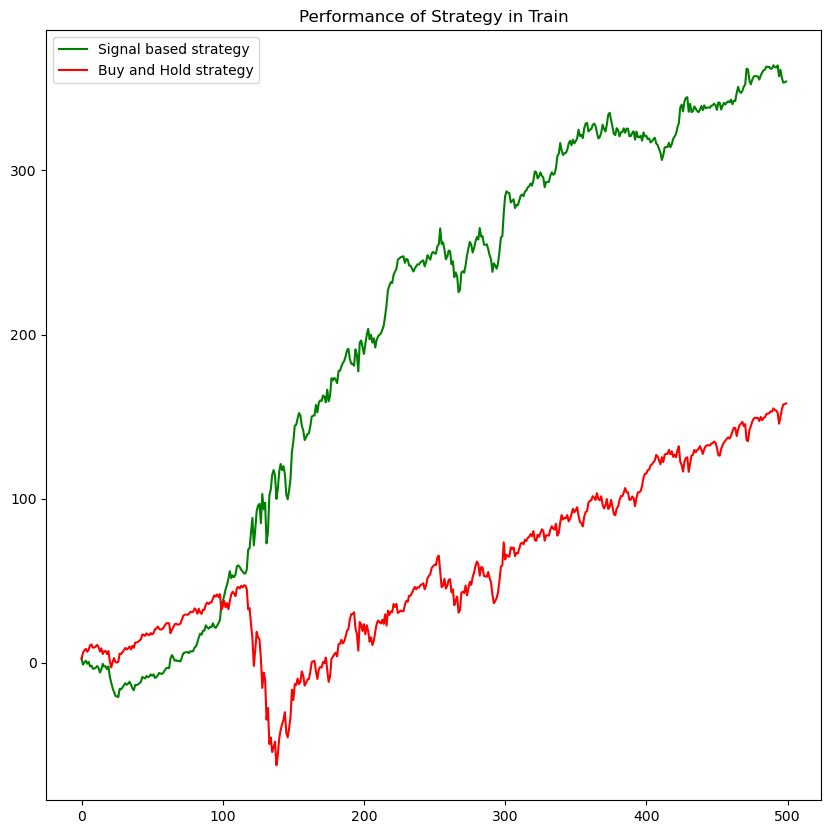

In [106]:
plt.figure(figsize=(10, 10))
plt.title('Performance of Strategy in Train')
plt.plot(Train_copy['Wealth'].values, color='green', label='Signal based strategy')
plt.plot(Train_copy['spy'].cumsum().values, color='red', label='Buy and Hold strategy')
plt.legend()
plt.show()

In [107]:
# Profit of signal-based strategy in Test
Test_copy['Order'] = [1 if sig>0 else -1 for sig in Test_copy['PredictedY']]
Test_copy['Profit'] = Test_copy['spy'] * Test_copy['Order']

Test_copy['Wealth'] = Test_copy['Profit'].cumsum()
print('Total profit made in Test: ', Test_copy['Profit'].sum())

Total profit made in Test:  32.86004638671892


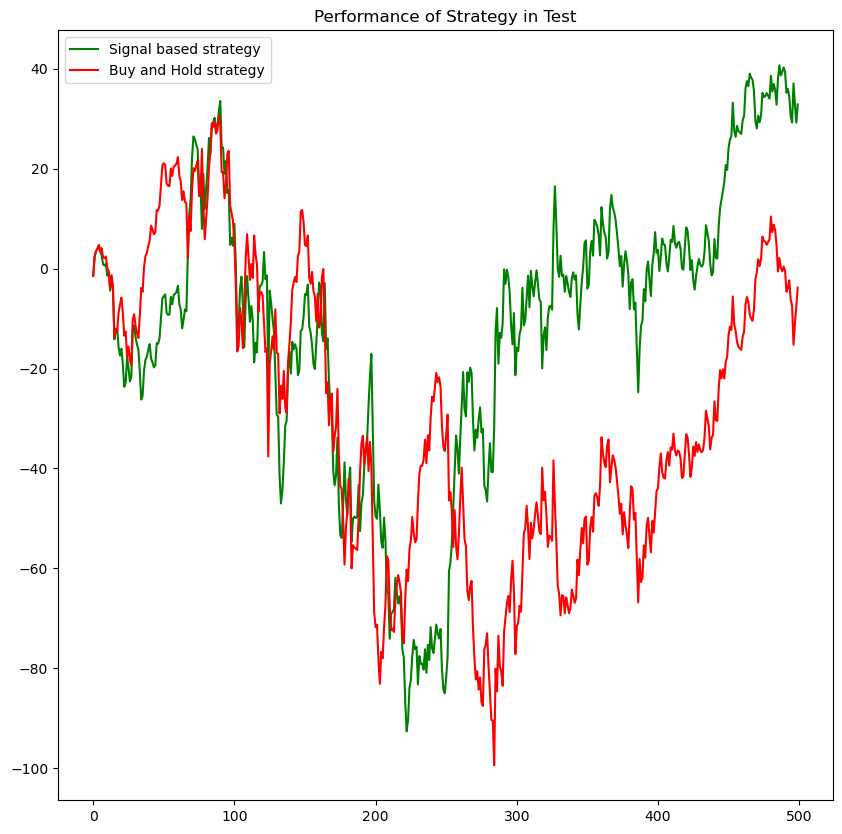

In [108]:
plt.figure(figsize=(10, 10))
plt.title('Performance of Strategy in Test')
plt.plot(Test_copy['Wealth'].values, color='green', label='Signal based strategy')
plt.plot(Test_copy['spy'].cumsum().values, color='red', label='Buy and Hold strategy')
plt.legend()
plt.show()

In [109]:
#Sharpe ratio and maximum drawdown

Train_copy['Wealth'] = Train_copy['Wealth'] + Train_copy.loc[Train_copy.index[0], 'Price']
Test_copy['Wealth'] = Test_copy['Wealth'] + Test_copy.loc[Test_copy.index[0], 'Price']

In [110]:
# Sharpe Ratio on Train data
Train_copy['Return'] = np.log(Train_copy['Wealth']) - np.log(Train_copy['Wealth'].shift(1))
dailyr = Train_copy['Return'].dropna()

print('Daily Sharpe Ratio is ', dailyr.mean()/dailyr.std(ddof=1))
print('Yearly Sharpe Ratio is ', (252**0.5)*dailyr.mean()/dailyr.std(ddof=1))

Daily Sharpe Ratio is  0.16103082210315692
Yearly Sharpe Ratio is  2.556285052207418


In [111]:
# Sharpe Ratio in Test data
Test_copy['Return'] = np.log(Test_copy['Wealth']) - np.log(Test_copy['Wealth'].shift(1))
dailyr = Test_copy['Return'].dropna()

print('Daily Sharpe Ratio is ', dailyr.mean()/dailyr.std(ddof=1))
print('Yearly Sharpe Ratio is ', (252**0.5)*dailyr.mean()/dailyr.std(ddof=1))

Daily Sharpe Ratio is  0.012421253725955816
Yearly Sharpe Ratio is  0.19718128998308118


In [112]:
# Maximum Drawdown in Train data
Train_copy['Peak'] = Train_copy['Wealth'].cummax()
Train_copy['Drawdown'] = (Train_copy['Peak'] - Train_copy['Wealth'])/Train_copy['Peak']
print('Maximum Drawdown in Train is ', Train_copy['Drawdown'].max())

Maximum Drawdown in Train is  0.07996179733264301


In [113]:
# Maximum Drawdown in Test data
Test_copy['Peak'] = Test_copy['Wealth'].cummax()
Test_copy['Drawdown'] = (Test_copy['Peak'] - Test_copy['Wealth'])/Test_copy['Peak']
print('Maximum Drawdown in Test is ', Test_copy['Drawdown'].max())

Maximum Drawdown in Test is  0.2616559809375283
